## Analyse des Einsatzes von Erschließungsstrategien beim Lesen

Am 2. 3. 2018 wurden an der Universität Valencia in zwei DaF-Gruppen (A2, B2) Daten zum wahrgenommenen Strategieneinsatz der Lernenden bei der Bearbeitung einer Aufgabe zum Lesen und Verstehen des neuen Wortschatzes erhoben.
Die Studierenden wurden gebeten, beim Lesen eines Textes aus dem Lehrwerk zunächst alle für sie neuen Wörter zu markieren (unabhängig von deren Verständnis). Nach einem zweiten Lesedurchgang sollten sie diese in eine Liste eintragen und angeben, welche Strategien sie angewendet hätten, um deren Bedeutung zu erkennen. 
Ein Teil der Lernenden hatte zuvor (freiwillig) an der Befragung zum Thema Erschließungsstrategien für unbekannten Wortschatz im Deutschen durch Lernende an spanischen Universitäten teilgenommen (siehe: http://diarium.usal.es/martinakienberger/200-2/?lang=de). Für alle Studierenden wurde kurz das Thema erklärt und Beispiele für Strategien gegeben. 

### Vorbereitung - Datenreinigung

In [1]:
import pandas as pd
import numpy as np
from sklearn.utils.extmath import randomized_svd
from adjustText import adjust_text
% pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
Rohdaten = pd.read_excel('D:\Daten\DISS\Daten\Valencia.xlsx')

In [3]:
Rohdaten.head(3)

,Grupo,ID_alumno,Encuesta,Palabra,Estrategia_1,Estrategia_2,Estrategia_Esp_1,Estrategia_Esp_2,Comentario
0,A2,1,1.0,lebendiger,AL,NaN,Comp,NaN,NaN
1,A2,1,1.0,langen,Con,NaN,NaN,NaN,NaN
2,A2,1,1.0,eigene,Dicc,NaN,NaN,NaN,NaN


#### Entfernung ungeeigneter Antworten

In [4]:
Rohdaten.loc[117]

Grupo                          A2
ID_alumno                       9
Encuesta                        2
Palabra                      Imis
Estrategia_1                  Con
Estrategia_2                  NaN
Estrategia_Esp_1    L1 = Deutsch!
Estrategia_Esp_2              NaN
Comentario                    NaN
Name: 117, dtype: object

In [5]:
Daten = Rohdaten.drop([117,372])

Als ungeeignet wurden ID 9 und ID 30 von der Analyse ausgeschlossen:
ID 9 war Deutsch-Erstsprecher.
ID 30 hatte die Aufgabe falsch verstanden und keine Strategien (sondern Übersetzungen) angegeben.

#### Auswahl der für die Analyse relevanten Teile der Erhebung

In [6]:
cols = ['Grupo','ID_alumno','Encuesta','Palabra','Estrategia_1','Estrategia_2']

In [7]:
data = Daten[cols]

In [8]:
data.loc[118]

Grupo                   A2
ID_alumno               10
Encuesta                 2
Palabra         lebendiger
Estrategia_1          Dicc
Estrategia_2           NaN
Name: 118, dtype: object

Weitere erfasste Informationen dienten einerseits zur Entscheidung für Aufnahme in oder Ausschluss aus der Analyse und können andererseits für spätere, detaillierte Analysen herangezogen werden.

### Analyse des Strategieneinsatzes

##### Unterteilung der beiden Gruppen

In [9]:
A2 = data[data.Grupo == 'A2']

In [10]:
B2 = data[data.Grupo == 'B2']

#### Gruppe A2

28 Teilnehmer

(6 hatten an Online-Befragung teilgenommen, 18 nicht, 4 keine Angabe)

In [72]:
print(r'Teilnehmer: ' + str(len(A2.ID_alumno.unique()))+'\n'+
      r'TN + Online-Befragung: ' + str(len(A2[A2.Encuesta == 1].ID_alumno.unique()))+'\n'+
      r'TN - Online-Befragung: ' + str(len(A2[A2.Encuesta == 2].ID_alumno.unique())))

Teilnehmer: 28
TN + Online-Befragung: 6
TN - Online-Befragung: 18


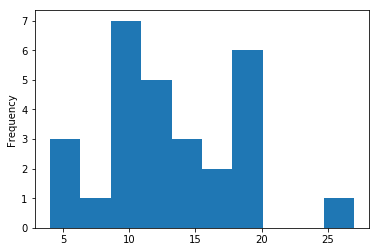

In [84]:
A2.ID_alumno.value_counts().plot(kind = 'hist',
                                bins = 10);

##### Als "neu" identifizierte Wörter (A2)

In [14]:
len(A2.Palabra.unique())

47

47 unterschiedliche Wörter wurden von den Lernenden als für sie "neu" angegeben. Bei der Datenübertragung von den Aufgabenblättern in Excel wurden orthographische Fehler berichtigt. Die Wörter wurden in der jeweiligen Schreibung des Originaltextes aus dem Lehrbuch übernommen (auch wenn die Lernenden teilweise stattdessen eine andere Form, z.B. Infinitiv, angaben). Das Wort "bietet ... an" wurde zweimal aufgenommen, einmal als "bietet" und einmal als "bietet an", je nach Angabe der Lernenden, die das Wort offenbar teilweise nicht als trennbares Verb erkannt hatten.

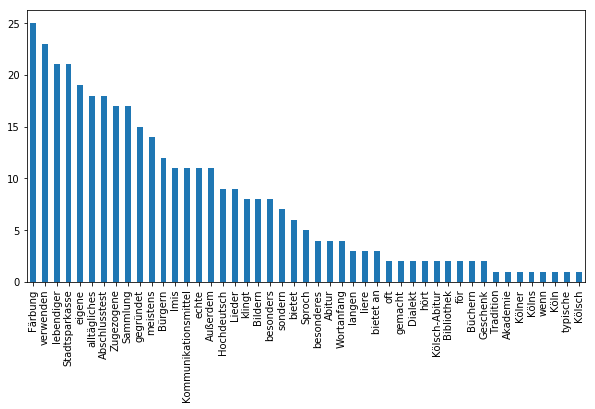

In [88]:
A2.Palabra.value_counts().plot(kind = 'bar', figsize = (10,5));

##### Kreuztabelle Studenten - neue Wörter (A2)

In [16]:
Al_Pal_A2 = pd.crosstab(A2.ID_alumno, A2.Palabra, margins = True)

In [90]:
Al_Pal_A2.T.head()
#solo mostrar una parte?
#mean...?

ID_alumno,1,2,3,4,5,6,7,8,10,11,...,21,22,23,24,25,26,27,28,29,All
Palabra,,,,,,,,,,,,,,,,,,,,,
Abitur,0,0,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,1,4
Abschlusstest,1,1,1,0,0,1,0,1,1,1,...,1,1,1,0,0,1,1,1,1,18
Akademie,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
Außerdem,1,0,0,0,0,1,0,1,0,0,...,0,1,1,0,0,0,0,0,1,11
Bibliothek,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2


In [98]:
print(r'Durchschnittlich als "neu" identifizierte Wortanzahl: '+str(Al_Pal_A2['All'][:-1].mean()))

Durchschnittlich als "neu" identifizierte Wortanzahl: 13.25


In [101]:
print(r'Minimum der als "neu" identifizierten Wörter: '+str(A2.ID_alumno.value_counts().min()) + '\n' +
      r'Maximum der als "neu" identifizierten Wörter: '+str(A2.ID_alumno.value_counts().max()))

Minimum der als "neu" identifizierten Wörter: 4
Maximum der als "neu" identifizierten Wörter: 27


Durchschnittlich wurden ca. 13 Wörter als "neu" identifiziert. Große Schwankungsbreite: zwischen 4 und 27 (siehe oben).

##### Einsatz von Erschließungsstrategien (A2)

Die freien Angaben der Lernenden wurden den Hauptkategorien aus der Online-Befragung zu Erschließungsstrategien zugeordnet und entsprechend in Excel erfasst:

* L1 = Descubro el significado o la función de palabras nuevas en alemán gracias a mi lengua materna. (Ich erschließe die Bedeutung oder Funktion unbekannter deutscher Wörter mit Hilfe meiner Muttersprache.)
* LE = Descubro el significado o la función de palabras nuevas en alemán con la ayuda de otras lenguas. (Ich erschließe unbekannte Wörter mit Hilfe anderer Sprachen.)
* AL = Utilizo mis conocimientos de alemán, p. ej. otras palabras conocidas, clases de palabras o la formación de palabras compuestas. (Ich nutze mein Wissen über das Deutsche, z.B. andere bekannte Wörter, Wortarten oder Kompositabildung.)
* Con = Utilizo información extraída del contexto, p. ej. la posición de una palabra en la frase o el formato del texto. (Ich nutze Informationen aus dem Kontext, z.B. die Position eines Wortes im Satz oder die Gestaltung des Textes.)
* Prof = Pido ayuda a mi profesor/a. (Ich bitte meinen Lehrer/meine Lehrerin um Hilfe.)
* Co = Pido ayuda a mis compañeros/as de clase. (Ich bitte die anderen Kursteilnehmer/innen um Hilfe.)
* Dicc = Consulto un diccionario u otra fuente (en papel o digital). (Ich konsultiere ein Wörterbuch oder eine andere Quelle (Printversion oder digital).)

Großteils konnte eine eindeutige Zuordnung vorgenommen werden. In Einzelfällen war es allerdings schwierig, zwischen "Lehrer/in um Hilfe bitten" und "andere Kursteilnehmer/innen um Hilfe bitten" zu unterscheiden (Angabe z.B. "he preguntado a otra persona" oder nur "he preguntado"). Zu beachten ist außerdem, dass zwar in vielen Fällen die L1 Spanisch (oder die ebenfalls romanische Sprache Valenciano) ist, in einigen Fällen aber Englisch oder eine andere europäische Sprache.

Manchmal gaben die Lernenden auch zwei, selten drei Strategien an. Wenn diese zwei unterschiedlichen Hauptstrategien zugeordnet werden konnten, wurden in diesen Fällen zwei Strategien erfasst. 

Beispiele:

"por el contexto y por la palabra Farbe" -> Kontext + Wissen über das Deutsche (2 Strategien)

"He separado la palabra y sabía que "Hoch" era alto y "deutsch" alemán." -> Wissen über das Deutsche (1 Strategie)

In [19]:
v1 = A2.Estrategia_1.value_counts()
v2 = A2.Estrategia_2.value_counts()

In [20]:
v = v1 + v2
v['L1'] = v1['L1']
v['LE'] = v1['LE']
v['Co'] = v1['Co']
v

AL       75.0
Co       31.0
Con      62.0
Dicc    177.0
L1       13.0
LE       11.0
Prof      5.0
dtype: float64

In [21]:
v.sort_values(ascending = False)

Dicc    177.0
AL       75.0
Con      62.0
Co       31.0
L1       13.0
LE       11.0
Prof      5.0
dtype: float64

Da die Angaben einiger Studierender zwei Strategien zugeordnet werden können, müssen die Nennungen für die Gesamtauswertung zusammengezählt werden.

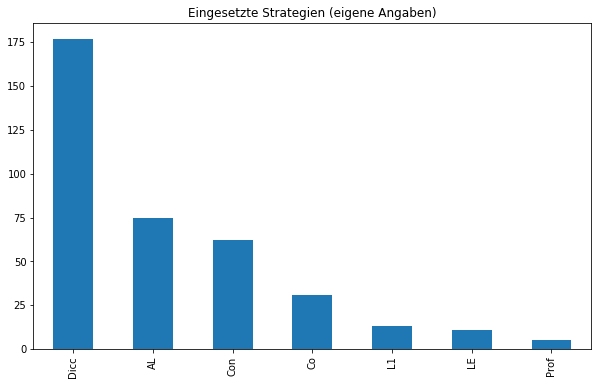

In [22]:
v.sort_values(ascending = False).plot(kind = 'bar', 
                                      title = 'Eingesetzte Strategien (eigene Angaben)',
                                     figsize = (10,6));

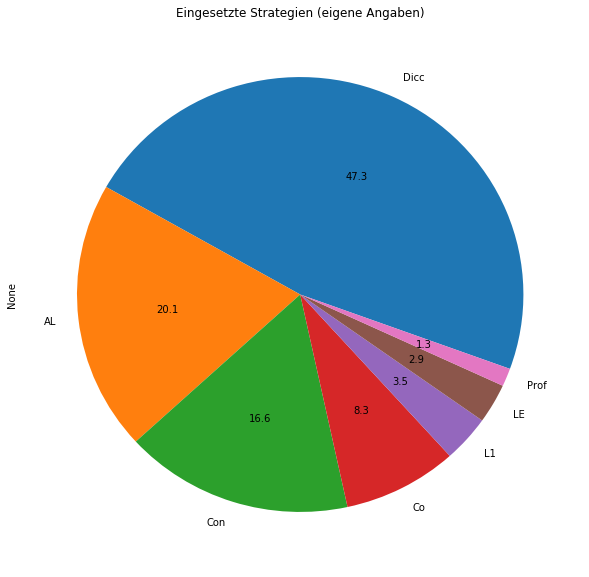

In [23]:
v.sort_values(ascending = False).plot(kind = 'pie', 
                                      title = 'Eingesetzte Strategien (eigene Angaben)', 
                                      figsize = (10,10),
                                      autopct='%.1f', startangle = -20);

In [24]:
A2.pivot_table('ID_alumno', index = ['Estrategia_1'], columns = None, aggfunc = 'count', fill_value = 0)

,ID_alumno
Estrategia_1,
AL,70
Co,31
Con,60
Dicc,173
L1,13
LE,11
Prof,4


In [25]:
A2.Estrategia_1.value_counts()

Dicc    173
AL       70
Con      60
Co       31
L1       13
LE       11
Prof      4
Name: Estrategia_1, dtype: int64

##### Kreuztabelle Studenten - verwendete Strategien (A2)

In [116]:
CTA2 = pd.crosstab(A2.ID_alumno, A2.Estrategia_1, margins = True)

CTA2_2 = pd.crosstab(A2.ID_alumno, A2.Estrategia_2, margins = True)

In [109]:
for val in CTA2_2.index:
    for col in CTA2_2.columns:
        if CTA2_2.loc[val,col]!=0:
            CTA2.loc[val,col] = CTA2.loc[val,col]+ CTA2_2.loc[val,col]

In [117]:
CTA2

Estrategia_1,AL,Co,Con,Dicc,L1,LE,Prof,All
ID_alumno,,,,,,,,
1,7,0,3,15,1,0,0,26
2,3,0,6,1,1,1,0,12
3,1,0,3,5,1,0,0,10
4,4,0,0,0,0,0,0,4
5,2,0,2,1,0,0,0,5
6,6,1,0,11,2,0,0,20
7,0,0,6,13,0,0,0,19
8,0,0,6,13,0,0,0,19
10,4,0,1,3,0,2,0,10


##### Biplot Studenten - verwendete Strategien (A2)

In [29]:
X = CTA2.values[:-1,:-1]
medias = X.mean(axis=0)
desv = X.std(axis=0)
X_st = (X-medias)/desv

In [30]:
dim = 7
alpha = 1
p = X.shape[1]
n = X.shape[0]

In [31]:
U, Sigma, VT = randomized_svd(X_st, n_components=dim,
                                      n_iter=5,
                                      random_state=None)

In [32]:
R = U.dot(np.diag(Sigma[:dim]))
C = np.transpose(VT).dot(np.diag(Sigma[:dim]))

sf = np.sum(np.power(X_st,2),axis=1)
cf = np.zeros((n,dim))
for k in range(0,dim):
    cf[:,k] = np.power(R[:,k],2)*100/sf
    
sc = np.sum(np.power(X_st,2),axis=0)
cc = np.zeros((p,dim))

for k in range(0,dim):
    cc[:,k] = np.power(C[:,k],2)*100/sc

R = R.dot(np.diag(np.power(Sigma,alpha)))
C = C.dot(np.diag(np.power(Sigma,1-alpha)))

sca = np.sum(np.power(R,2))/n
scb = np.sum(np.power(C,2))/p
scf = np.sqrt(np.sqrt(scb/sca))

R = R*scf
C = C/scf

In [33]:
CTA2.index[:-1]

Index([ 1,  2,  3,  4,  5,  6,  7,  8, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
       20, 21, 22, 23, 24, 25, 26, 27, 28, 29],
      dtype='object', name='ID_alumno')

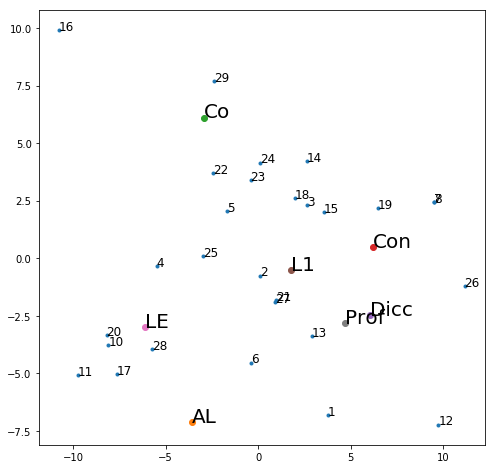

In [34]:
fig = plt.figure(figsize=(8,8))
ax1 = fig.add_subplot(111)

ax1.scatter(R[:,0],R[:,1], s = 9)
for i in range(R.shape[0]):
    ax1.text(R[i,0],R[i,1], str(CTA2.index[:-1][i]), fontsize=12 )
for i in range(C.shape[0]):
    #ax1.arrow(0,0,C[i,0],C[i,1])
    ax1.scatter(C[i,0],C[i,1])
    ax1.text(C[i,0],C[i,1],CTA2.columns[:-1][i],fontsize=20)
    
plt.show()

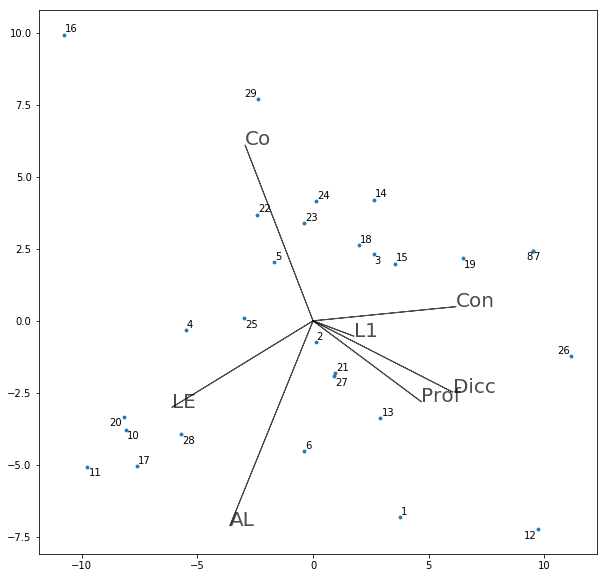

In [35]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)

for i in range(C.shape[0]):
    ax.arrow(0,0,C[i,0],C[i,1], alpha = 0.7)
    #ax.scatter(C[i,0],C[i,1])
    ax.text(C[i,0],C[i,1],CTA2.columns[:-1][i],fontsize=20, alpha = 0.7)

ax.scatter(R[:,0],R[:,1], s = 8)
texts = [plt.text(R[i,0],R[i,1], CTA2.index[:-1][i], ha='center', va='center') for i in range(len(R[:,0]))]
adjust_text(texts);

##### Kreuztabelle Wörter - verwendete Strategien (A2)

In [36]:
Pal_Es_A2 = pd.crosstab(A2.Palabra, A2.Estrategia_1, margins = True)
Pal_Es_A2_2 = pd.crosstab(A2.Palabra, A2.Estrategia_2, margins = True)

In [37]:
for val in Pal_Es_A2_2.index:
    for col in Pal_Es_A2_2.columns:
        if Pal_Es_A2_2.loc[val,col]!=0:
            Pal_Es_A2.loc[val,col] = Pal_Es_A2.loc[val,col]+ Pal_Es_A2_2.loc[val,col]

In [38]:
Pal_Es_A2.sort_values(['All'], ascending=[0])

Estrategia_1,AL,Co,Con,Dicc,L1,LE,Prof,All
Palabra,,,,,,,,
All,75,31,62,177,13,11,5,374
Färbung,9,3,2,10,0,0,2,26
Stadtsparkasse,11,2,3,6,1,1,0,24
verwenden,0,2,7,14,0,0,0,23
lebendiger,9,2,1,10,0,0,0,22
eigene,0,1,5,14,0,0,0,20
alltägliches,7,2,3,5,0,0,1,18
Abschlusstest,7,0,0,11,0,0,0,18
Sammlung,0,1,7,8,1,0,0,17


In dieser Kreuztabelle werden als neu identifizierte Wörter mit den angegebenen Strategien in absteigender Frequenz dargestellt.

##### Biplot Wörter - verwendete Strategien (A2)

In [39]:
X = Pal_Es_A2.values[:-1,:-1]
medias = X.mean(axis=0)
desv = X.std(axis=0)
X_st = (X-medias)/desv

dim = 7
alpha = 1
p = X.shape[1]
n = X.shape[0]

U, Sigma, VT = randomized_svd(X_st, n_components=dim,
                                      n_iter=5,
                                      random_state=None)

R = U.dot(np.diag(Sigma[:dim]))
C = np.transpose(VT).dot(np.diag(Sigma[:dim]))

sf = np.sum(np.power(X_st,2),axis=1)
cf = np.zeros((n,dim))
for k in range(0,dim):
    cf[:,k] = np.power(R[:,k],2)*100/sf
    
sc = np.sum(np.power(X_st,2),axis=0)
cc = np.zeros((p,dim))

for k in range(0,dim):
    cc[:,k] = np.power(C[:,k],2)*100/sc

R = R.dot(np.diag(np.power(Sigma,alpha)))
C = C.dot(np.diag(np.power(Sigma,1-alpha)))

sca = np.sum(np.power(R,2))/n
scb = np.sum(np.power(C,2))/p
scf = np.sqrt(np.sqrt(scb/sca))

R = R*scf
C = C/scf

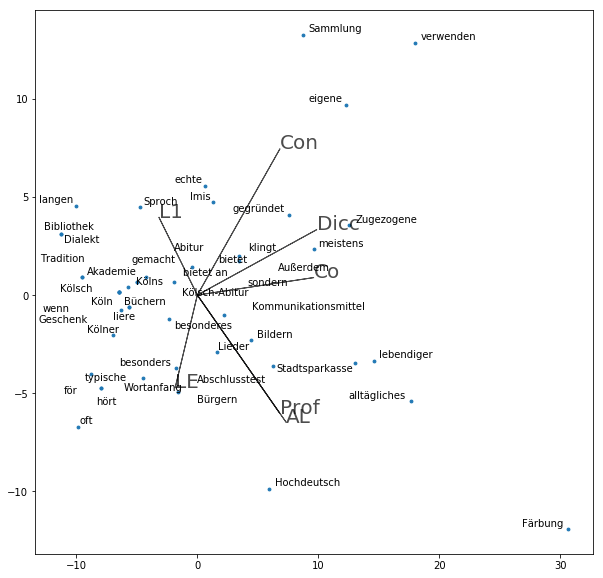

In [40]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)

for i in range(C.shape[0]):
    ax.arrow(0,0,C[i,0],C[i,1], alpha = 0.7)
    #ax.scatter(C[i,0],C[i,1])
    ax.text(C[i,0],C[i,1],Pal_Es_A2.columns[:-1][i],fontsize=20, alpha = 0.7)

ax.scatter(R[:,0],R[:,1], s = 8)
texts = [plt.text(R[i,0],R[i,1], Pal_Es_A2.index[:-1][i], ha='center', va='center') for i in range(len(R[:,0]))]
adjust_text(texts);

#### Gruppe B2

13 Teilnehmer

(9 hatten an Online-Befragung teilgenommen, 3 nicht, 1 keine Angabe)

3 Teilnehmer (ID 37-39) haben sich nur teilweise während des für die Aufgabe vorgesehenen Zeitraums mit dieser beschäftigt. Aus diesem Grund konnten sie weniger Wörter und Strategien angeben.

In [41]:
B2.ID_alumno.value_counts()

34    34
32    30
36    27
43    24
35    23
42    20
38    20
41    16
39    16
33    16
40    15
37    13
31    13
Name: ID_alumno, dtype: int64

In [42]:
B2.loc[564]

Grupo                B2
ID_alumno            39
Encuesta              1
Palabra         Maßstab
Estrategia_1        NaN
Estrategia_2        NaN
Name: 564, dtype: object

In [125]:
#B2_1 = B2.drop(data.index[514:563])
B2_1 = B2[(B2.ID_alumno != 37) & (B2.ID_alumno != 38) & (B2.ID_alumno != 39)].reset_index(drop = True)

In [137]:
B2_1.ID_alumno.value_counts()

34    34
32    30
36    27
43    24
35    23
42    20
41    16
33    16
40    15
31    13
Name: ID_alumno, dtype: int64

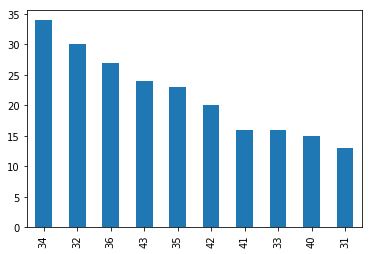

In [140]:
B2_1.ID_alumno.value_counts().plot(kind = 'bar');

##### Als "neu" identifizierte Wörter

In [45]:
len(B2.Palabra.unique())

71

In [46]:
B2.Palabra.value_counts()

Hautaufhellung          11
Wohlstand               11
erstrebenswert           9
üppige                   9
Oberweite                9
Maßstab                  9
Gesellschaftsschicht     9
Rundungen                9
Ähnlich                  9
blass                    8
Hinweis                  8
belastbar                8
kräftig                  8
Hautton                  8
Schlanksein              8
wesentlich               7
Hautfarbe                7
Fortschritt              7
gilt                     6
vornehm                  5
abhängig                 5
Sonnenschirm             4
daheim                   4
verfügt                  4
Bevölkerung              4
wohlhabenden             4
glätten                  4
galten                   3
jeweilige                3
speisen                  3
                        ..
eher                     2
leisten                  2
Erfolg                   2
betrachtet               2
früheren                 2
umgekehrt                2
F

Ein Wort konnte nicht entziffert werden (Schrift schwer lesbar) und ist mit "?" angegeben.

##### Kreuztabelle Studenten - neue Wörter (B2)

In [47]:
Al_Pal_B2 = pd.crosstab(B2.ID_alumno, B2.Palabra, margins = True)
Al_Pal_B2_1 = pd.crosstab(B2_1.ID_alumno, B2_1.Palabra, margins = True)
Al_Pal_B2_1

Palabra,?,Bevölkerung,Einwohner,Feld,Fortschritt,Gesellschaftsschicht,Haare,Hautaufhellung,Hautfarbe,Hautton,...,umgekehrt,verfügt,vornehm,wesentlich,wohlhabenden,zahlreiche,Ähnlich,übrigens,üppige,All
ID_alumno,,,,,,,,,,,,,,,,,,,,,
31,0,0,0,0,1,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,13
32,0,0,0,1,0,1,0,1,1,1,...,0,1,0,1,1,0,0,0,1,30
33,0,0,0,0,1,1,0,1,1,0,...,0,0,1,0,0,0,1,0,1,16
34,0,1,1,1,1,1,0,1,1,1,...,0,0,1,1,1,1,1,0,0,34
35,0,1,0,0,1,1,0,1,0,1,...,1,1,0,1,1,0,1,0,1,23
36,1,0,0,0,1,1,0,1,0,0,...,0,1,0,1,0,0,1,0,1,27
40,0,1,0,0,1,0,1,1,1,1,...,0,0,1,0,0,0,1,0,0,15
41,0,0,0,0,0,0,0,1,0,1,...,0,1,1,0,0,0,0,1,1,16
42,0,0,0,0,0,1,0,1,1,0,...,0,0,0,1,1,0,1,0,1,20


In [48]:
267/13

20.53846153846154

In [49]:
218/10

21.8

Durchschnittlich wurden ca. 20,5 Wörter pro Person als "neu" identifiziert, ca. 22, wenn die "langsamen" TN unberücksichtigt bleiben. Schwankungsbreite: zwischen 13 und 34.

##### Einsatz von Erschließungsstrategien (B2)

In [50]:
w1 = B2.Estrategia_1.value_counts()
w2 = B2.Estrategia_2.value_counts()
w = w1 + w2
w['LE'] = w1['LE']
w['Prof'] = w1['Prof']

In [51]:
w.sort_values(ascending = False)

Dicc    125.0
AL       63.0
Con      52.0
Co       15.0
L1        4.0
Prof      3.0
LE        1.0
dtype: float64

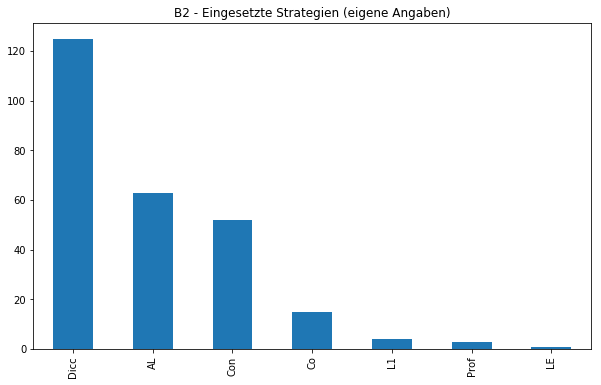

In [52]:
w.sort_values(ascending = False).plot(kind = 'bar', 
                                      title = 'B2 - Eingesetzte Strategien (eigene Angaben)',
                                     figsize = (10,6));

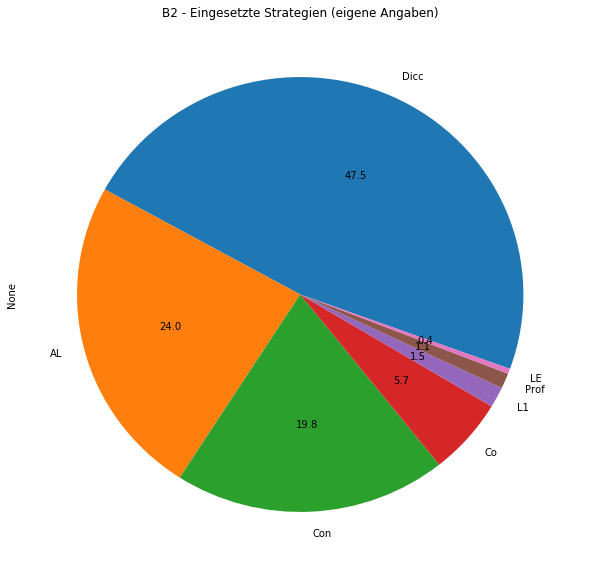

In [53]:
w.sort_values(ascending = False).plot(kind = 'pie', 
                                      title = 'B2 - Eingesetzte Strategien (eigene Angaben)', 
                                      figsize = (10,10),
                                      autopct='%.1f', startangle = -20);

##### Kreuztabelle Studenten - verwendete Strategien (B2)

In [54]:
CTB2 = pd.crosstab(B2.ID_alumno, B2.Estrategia_1, margins = True)
CTB2_2 = pd.crosstab(B2.ID_alumno, B2.Estrategia_2, margins = True)

In [55]:
for val in CTB2_2.index:
    for col in CTB2_2.columns:
        if CTB2_2.loc[val,col]!=0:
            CTB2.loc[val,col] = CTB2.loc[val,col]+ CTB2_2.loc[val,col]

In [56]:
CTB2.head()

Estrategia_1,AL,Co,Con,Dicc,L1,LE,Prof,All
ID_alumno,,,,,,,,
31,4,2,7,5,2,0,0,20
32,7,0,12,12,0,0,1,32
33,1,1,2,11,0,1,0,16
34,8,5,9,19,0,0,0,41
35,4,3,1,16,0,0,0,24


##### Biplot Studenten - verwendete Strategien (B2)

In [57]:
X = CTB2.values[:-1,:-1]
medias = X.mean(axis=0)
desv = X.std(axis=0)
X_st = (X-medias)/desv

dim = 7
alpha = 1
p = X.shape[1]
n = X.shape[0]

U, Sigma, VT = randomized_svd(X_st, n_components=dim,
                                      n_iter=5,
                                      random_state=None)

R = U.dot(np.diag(Sigma[:dim]))
C = np.transpose(VT).dot(np.diag(Sigma[:dim]))

sf = np.sum(np.power(X_st,2),axis=1)
cf = np.zeros((n,dim))
for k in range(0,dim):
    cf[:,k] = np.power(R[:,k],2)*100/sf
    
sc = np.sum(np.power(X_st,2),axis=0)
cc = np.zeros((p,dim))

for k in range(0,dim):
    cc[:,k] = np.power(C[:,k],2)*100/sc

R = R.dot(np.diag(np.power(Sigma,alpha)))
C = C.dot(np.diag(np.power(Sigma,1-alpha)))

sca = np.sum(np.power(R,2))/n
scb = np.sum(np.power(C,2))/p
scf = np.sqrt(np.sqrt(scb/sca))

R = R*scf
C = C/scf

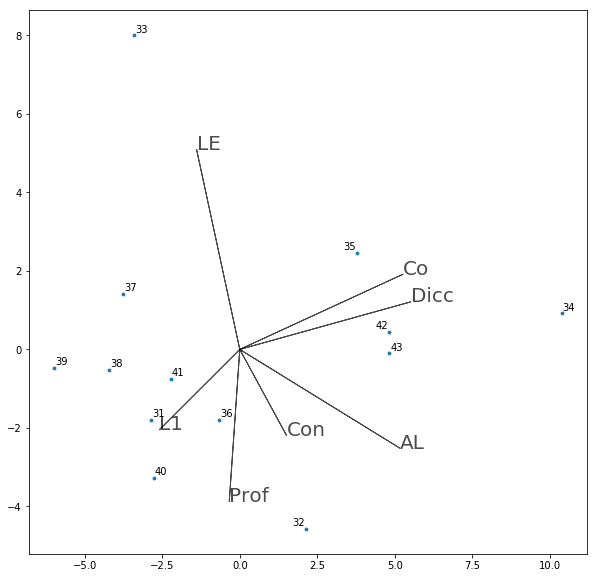

In [58]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)

for i in range(C.shape[0]):
    ax.arrow(0,0,C[i,0],C[i,1], alpha = 0.7)
    #ax.scatter(C[i,0],C[i,1])
    ax.text(C[i,0],C[i,1],CTB2.columns[:-1][i],fontsize=20, alpha = 0.7)

ax.scatter(R[:,0],R[:,1], s = 8)
texts = [plt.text(R[i,0],R[i,1], CTB2.index[:-1][i], ha='center', va='center') for i in range(len(R[:,0]))]
adjust_text(texts);

##### Kreuztabelle Wörter - verwendete Strategien (B2)

In [59]:
Pal_Es_B2 = pd.crosstab(B2.Palabra, B2.Estrategia_1, margins = True)
Pal_Es_B2_2 = pd.crosstab(B2.Palabra, B2.Estrategia_2, margins = True)

In [60]:
for val in Pal_Es_B2_2.index:
    for col in Pal_Es_B2_2.columns:
        if Pal_Es_B2_2.loc[val,col]!=0:
            Pal_Es_B2.loc[val,col] = Pal_Es_B2.loc[val,col]+ Pal_Es_B2_2.loc[val,col]

In [61]:
Pal_Es_B2.sort_values(['All'], ascending=[0])

Estrategia_1,AL,Co,Con,Dicc,L1,LE,Prof,All
Palabra,,,,,,,,
All,63,15,52,125,4,1,3,263
Wohlstand,6,1,1,5,0,0,0,13
Hautaufhellung,8,2,3,0,0,0,0,13
Rundungen,2,0,2,5,3,0,0,12
Hautton,8,1,1,2,0,0,0,12
Gesellschaftsschicht,4,1,1,5,0,0,0,11
üppige,0,0,2,7,0,0,1,10
Hautfarbe,6,0,3,1,0,0,0,10
Oberweite,0,2,2,4,0,0,0,8


##### Biplot Wörter - verwendete Strategien (B2)

In [62]:
X = Pal_Es_B2.values[:-1,:-1]
medias = X.mean(axis=0)
desv = X.std(axis=0)
X_st = (X-medias)/desv

dim = 7
alpha = 1
p = X.shape[1]
n = X.shape[0]

U, Sigma, VT = randomized_svd(X_st, n_components=dim,
                                      n_iter=5,
                                      random_state=None)

R = U.dot(np.diag(Sigma[:dim]))
C = np.transpose(VT).dot(np.diag(Sigma[:dim]))

sf = np.sum(np.power(X_st,2),axis=1)
cf = np.zeros((n,dim))
for k in range(0,dim):
    cf[:,k] = np.power(R[:,k],2)*100/sf
    
sc = np.sum(np.power(X_st,2),axis=0)
cc = np.zeros((p,dim))

for k in range(0,dim):
    cc[:,k] = np.power(C[:,k],2)*100/sc

R = R.dot(np.diag(np.power(Sigma,alpha)))
C = C.dot(np.diag(np.power(Sigma,1-alpha)))

sca = np.sum(np.power(R,2))/n
scb = np.sum(np.power(C,2))/p
scf = np.sqrt(np.sqrt(scb/sca))

R = R*scf
C = C/scf

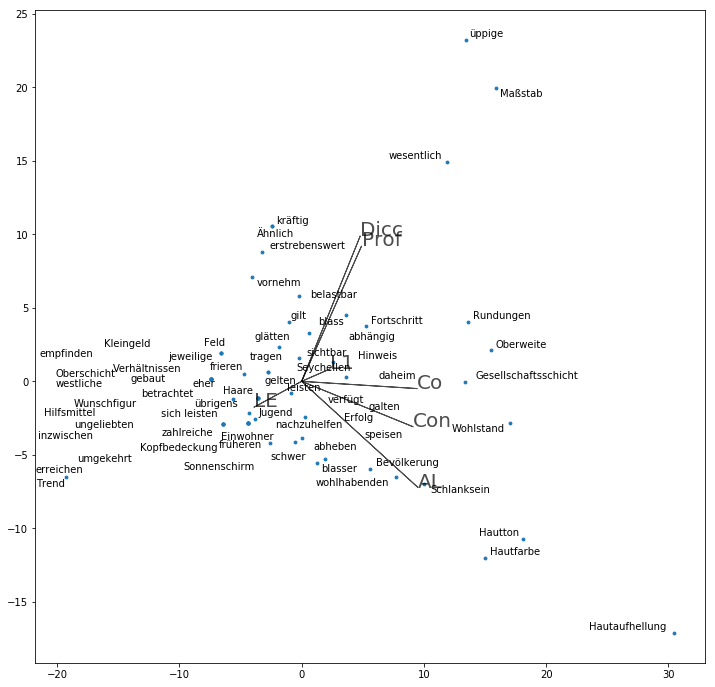

In [63]:
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111)

for i in range(C.shape[0]):
    ax.arrow(0,0,C[i,0],C[i,1], alpha = 0.7)
    #ax.scatter(C[i,0],C[i,1])
    ax.text(C[i,0],C[i,1],Pal_Es_B2.columns[:-1][i],fontsize=20, alpha = 0.7)

ax.scatter(R[:,0],R[:,1], s = 8)
texts = [plt.text(R[i,0],R[i,1], Pal_Es_B2.index[:-1][i], ha='center', va='center') for i in range(len(R[:,0]))]
adjust_text(texts);

In [64]:
data[(data.Grupo == 'B2') & (data.Encuesta == 1)].Palabra.value_counts()

Oberweite               8
Wohlstand               8
Gesellschaftsschicht    7
Hautaufhellung          7
Maßstab                 7
erstrebenswert          7
üppige                  6
Rundungen               6
Ähnlich                 6
Schlanksein             5
blass                   5
Hautton                 5
gilt                    5
Hinweis                 5
Fortschritt             5
wesentlich              5
kräftig                 5
belastbar               5
abhängig                4
daheim                  4
Hautfarbe               4
vornehm                 3
glätten                 3
galten                  3
nachzuhelfen            3
wohlhabenden            3
Sonnenschirm            3
verfügt                 3
früheren                2
sichtbar                2
                       ..
Bevölkerung             2
Feld                    2
umgekehrt               2
speisen                 2
blasser                 2
Erfolg                  2
sich leisten            1
ungeliebten 